In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from fytok.Tokamak import Tokamak
from fytok.utils.load_scenario import load_scenario
from fytok.utils.plot_profiles import plot_profiles, sp_figure
import scipy.constants
from spdm.data.Expression import Variable
from spdm.data.File import File
from spdm.utils.logger import logger
import freegs


2023-06-16 07:14:28,050 INFO [spdm] : Set mapping path: /home/salmon/workspace/fytok/python/fytok/_mapping


In [2]:
scenario = load_scenario("/home/salmon/workspace/data/15MA inductive - burn")


2023-06-16 07:14:30,192 INFO [spdm] : Load scenario/profiles from /home/salmon/workspace/data/15MA inductive - burn/15MA Inductive at burn-ASTRA.xls
2023-06-16 07:14:30,303 INFO [spdm] : Load module spdm.plugins.data.PluginGEQdsk from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py
2023-06-16 07:14:30,306 DEBUG [spdm] /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py:329:__init__: Open File URITuple(protocol='local', authority='', path=PosixPath('/home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt'), query=None, fragment='', format='', schema='') mode=Mode.read
2023-06-16 07:14:30,349 INFO [spdm] : Load scenario/equilibrium from /home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt


In [3]:
tok = Tokamak("ITER",
              name=scenario["name"],
              description=scenario["description"],
              core_profiles={**scenario["core_profiles"],
                             #  "$default_value": {
                             #      "profiles_1d": {"grid": {
                             #          "rho_tor_norm": np.linspace(0, 1.0, 100),
                             #          "psi": np.linspace(0, 1.0, 100),
                             #          "psi_magnetic_axis": 0.0,
                             #          "psi_boundary": 1.0,
                             #      }}}
                             },
              equilibrium={**scenario["equilibrium"],
                           "code": {"name":  "freegs", "parameters": {"boundary": "free"}},
                           "$default_value": {"time_slice": {
                               "boundary": {"psi_norm": 0.99},
                               "coordinate_system": {"grid": {"dim1": 256, "dim2": 128}}
                           }}}
              )


2023-06-16 07:14:31,209 INFO [spdm] : Load module spdm.plugins.data.PluginXML from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginXML.py


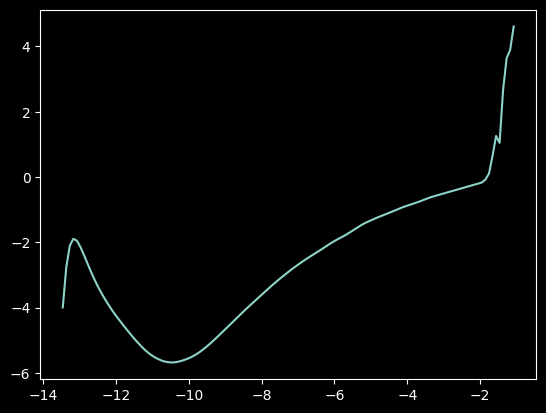

In [4]:
plt.plot(scenario["equilibrium"]["time_slice"][0]["profiles_1d"]["psi"],
         scenario["equilibrium"]["time_slice"][0]["profiles_1d"]["f_df_dpsi"])


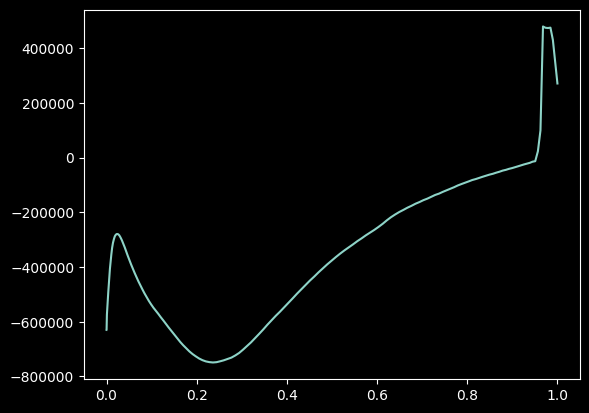

In [5]:
plt.plot(tok.core_profiles.profiles_1d[0].grid.psi_norm.__array__(),
         -tok.core_profiles.profiles_1d[0].ffprime.__array__(),)


In [6]:
j_tor=tok.equilibrium.time_slice.current.profiles_2d[0].j_tor.__array__()       

2023-06-16 07:14:35,442 INFO [spdm] : Load module fytok.plugins.equilibrium.freegs from /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py
2023-06-16 07:14:35,455 INFO [spdm] : Load module spdm.mesh.RectangularMesh from /home/salmon/workspace/SpDB/python/spdm/mesh/RectangularMesh.py


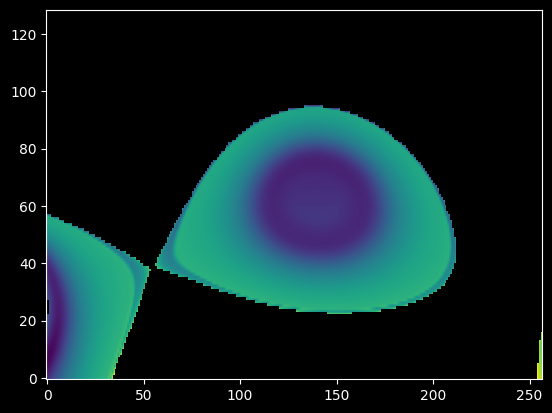

In [11]:
plt.imshow(j_tor, origin="lower", aspect="auto")

In [18]:
psi=np.linspace(tok.equilibrium.time_slice.current.global_quantities.psi_axis,
tok.equilibrium.time_slice.current.global_quantities.psi_boundary,100)


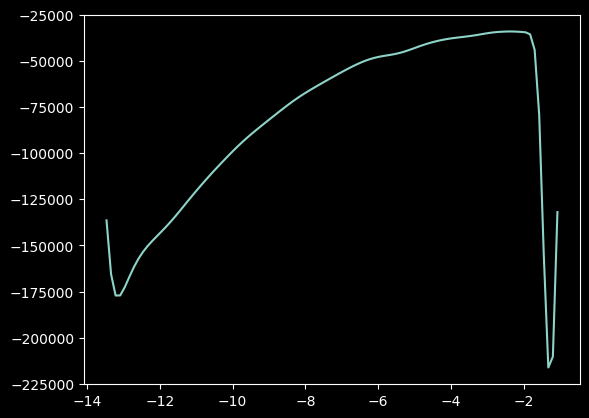

In [20]:
plt.plot(psi,tok.equilibrium.time_slice.current.profiles_1d.pprime(psi))


In [22]:
psirz=tok.equilibrium.time_slice.current.profiles_2d[0].psi.__array__()

In [26]:
psi2=np.linspace(np.min(psirz),np.max(psirz),100)

In [28]:
tok.equilibrium.time_slice.current.profiles_1d.pprime(psi2)


array([             nan, -174860.21215062, -155467.75169429,
       -144272.00514665, -133845.25484204, -122137.26766137,
       -111113.91743687, -100959.41403989,  -91763.53282898,
        -83796.19724284,  -76186.93449957,  -69208.26329654,
        -63357.19150022,  -57910.76062097,  -52791.25782577,
        -48850.58906789,  -46842.09686241,  -44585.93267457,
        -41191.16832193,  -38635.51715396,  -37178.71671688,
        -35888.11287671,  -34412.15204923,  -34008.42147535,
        -35637.43565424, -214032.01454438,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,

2023-06-16 06:36:37,364 INFO [spdm] : Load module fytok.plugins.equilibrium.freegs from /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py
2023-06-16 06:36:37,365 INFO [spdm] : Update Equilibrium: EquilibriumFreeGS
2023-06-16 06:36:37,371 INFO [spdm] : Load module spdm.mesh.RectangularMesh from /home/salmon/workspace/SpDB/python/spdm/mesh/RectangularMesh.py
2023-06-16 06:36:37,373 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:95:_setup_equilibrium: Using free boundary
2023-06-16 06:36:37,402 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:78:_setup_machine: Setup machine description: wall={'name': 'ITER', 'index': 1, 'description': 'for equilibrium codes (single closed limiter and vessel);'}
2023-06-16 06:36:40,879 INFO [spdm] : Create Profile: Specified profile functions p'(psi), ff'(psi)
2023-06-16 06:36:40,881 DEBUG [spdm] /home/salmon/workspace/

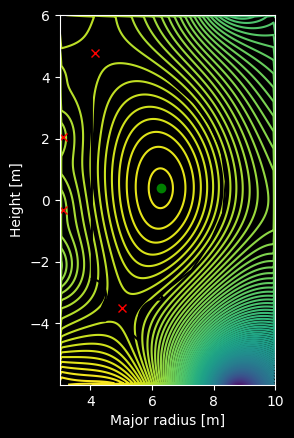

psi_relchange: nan
bndry_relchange: 1.0
bndry_change: 1.0966742840085693




/home/salmon/.local/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/salmon/.local/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


RuntimeError: Solve G-S equation failed [EquilibriumFreeGS]!

In [6]:
tok.equilibrium.update(
    core_profiles_1d=tok.core_profiles.profiles_1d.current,
    lcfs=True,
    wall=tok.wall,
    pf_active=tok.pf_active,
    Ip=1.5e6, beta_p=0.6056,
    tolerance=1.0e-2,)


<Axes: >

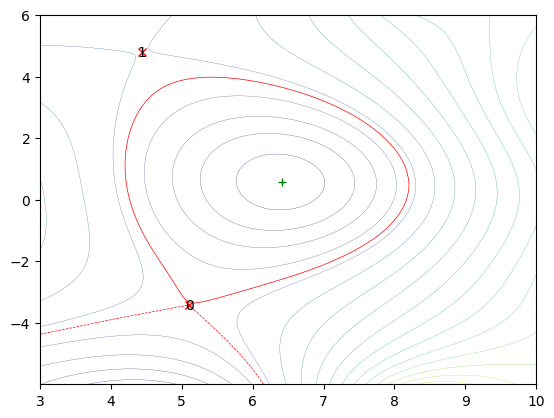

In [8]:
tok.equilibrium.plot()


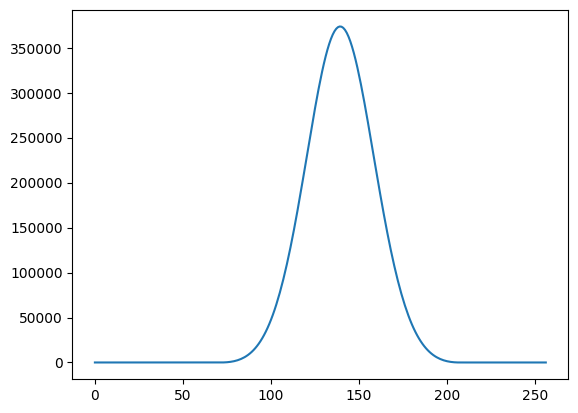

In [11]:
j_tor = tok.equilibrium.time_slice[-1].profiles_2d[0].j_tor.__array__()
plt.plot(j_tor[60, :])


In [13]:


psi_norm = tok.core_profiles.profiles_1d[-1].grid.psi_norm
R0 = tok.core_profiles.profiles_1d[-1].grid.r0
B0 = tok.core_profiles.profiles_1d[-1].grid.b0
pprime = tok.core_profiles.profiles_1d[-1].pprime.pullback(psi_norm)

ffprime = tok.core_profiles.profiles_1d[-1].ffprime.pullback(psi_norm)

profiles = freegs.jtor.ProfilesPprimeFfprime(pprime, ffprime, R0*B0)


ValueError: x must be increasing if s > 0